# WeatherPy

1. As expected, temperature peaks near the equator, with temperature gradually decreases as distance from the equator increases in both directions.
2. The lowest percentage humidity locations are nearest to the equator.
3. There does not seem to be any discernible relationship between latitude and wind speed.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests as req
import time
from citipy import citipy
import seaborn

In [2]:
lat = np.random.uniform(low=-90.0, high=90.0, size=1300)
lng = np.random.uniform(low=-180.0, high=180.0, size=1300)

In [3]:
weather_df = pd.DataFrame({"Latitude": lat, "Longitude": lng})
weather_df.head()

,Latitude,Longitude
0,84.858551,38.888021
1,-40.729878,-124.679456
2,17.423483,7.167504
3,76.032980,98.447958
4,-46.540744,-172.262122


In [4]:
weather_df["City"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Temperature (F)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Wind Speed (mph)"] = ""

In [5]:
weather_df.head()

,Latitude,Longitude,City,Country,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,84.858551,38.888021,,,,,,,
1,-40.729878,-124.679456,,,,,,,
2,17.423483,7.167504,,,,,,,
3,76.032980,98.447958,,,,,,,
4,-46.540744,-172.262122,,,,,,,


In [6]:
api_key = "577f692bda463ed51e5e7f3632a90604"
url = "http://api.openweathermap.org/data/2.5/weather?" 
units = "imperial"
counter = 1

for index, row in weather_df.iterrows():
    try:
        lat_check = row["Latitude"]
        lng_check = row["Longitude"]
        city = citipy.nearest_city(lat_check, lng_check)
        cityname = city.city_name
        country_name = city.country_code
        
        query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + cityname + "," + country_name
    
        print("Checking coordinates #" + str(counter) + " for " + cityname + "," + country_name)
        print("URL: " + query_url)
        print("-----------------------------------------------------------------------------")
    
        response = req.get(query_url).json()
        
        temp = response["main"]["temp_max"]
        humid = response["main"]["humidity"]
        cloudy = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        date = response["dt"]
        newlat = response["coord"]["lat"]
        newlng = response["coord"]["lon"]
    
        weather_df.set_value(index, "City", cityname)
        weather_df.set_value(index, "Country", country_name)
        weather_df.set_value(index, "Date", date)
        weather_df.set_value(index, "Max Temperature (F)", pd.to_numeric(temp))
        weather_df.set_value(index, "Humidity (%)", humid)
        weather_df.set_value(index, "Cloudiness (%)", cloudy)
        weather_df.set_value(index, "Wind Speed (mph)", wind)
        #probably unnecessary, but replacing previous coordinates with city coordinates for accuracy
        weather_df.set_value(index, "Latitude", newlat)
        weather_df.set_value(index, "Longitude", newlng)
    except:
        print("Oops, skipping this one!")
    
    counter = counter + 1
    
    time.sleep(2)


Checking coordinates #1 for tumannyy,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=tumannyy,ru
-----------------------------------------------------------------------------
Checking coordinates #2 for rikitea,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=rikitea,pf
-----------------------------------------------------------------------------
Checking coordinates #3 for agadez,ne
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=agadez,ne
-----------------------------------------------------------------------------
Checking coordinates #4 for khatanga,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=khatanga,ru
-----------------------------------------------------------------------------
Checking coordinates #5 for vaini,to
URL: http://api.o

Checking coordinates #36 for amderma,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=amderma,ru
-----------------------------------------------------------------------------
Checking coordinates #37 for ushuaia,ar
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=ushuaia,ar
-----------------------------------------------------------------------------
Checking coordinates #38 for shimanovsk,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=shimanovsk,ru
-----------------------------------------------------------------------------
Checking coordinates #39 for mataura,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=mataura,pf
-----------------------------------------------------------------------------
Checking coordinates #40 for chokurdakh,ru
URL

Checking coordinates #70 for borogontsy,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=borogontsy,ru
-----------------------------------------------------------------------------
Checking coordinates #71 for matamoros,mx
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=matamoros,mx
-----------------------------------------------------------------------------
Checking coordinates #72 for oktyabrskiy,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=oktyabrskiy,ru
-----------------------------------------------------------------------------
Checking coordinates #73 for ribeira grande,pt
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=ribeira grande,pt
-----------------------------------------------------------------------------
Checking coordinates

Checking coordinates #104 for manyana,bw
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=manyana,bw
-----------------------------------------------------------------------------
Checking coordinates #105 for nikolskoye,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=nikolskoye,ru
-----------------------------------------------------------------------------
Checking coordinates #106 for ushuaia,ar
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=ushuaia,ar
-----------------------------------------------------------------------------
Checking coordinates #107 for vaini,to
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=vaini,to
-----------------------------------------------------------------------------
Checking coordinates #108 for safaga,eg
URL: h

Checking coordinates #138 for beidao,cn
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=beidao,cn
-----------------------------------------------------------------------------
Checking coordinates #139 for jamestown,sh
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=jamestown,sh
-----------------------------------------------------------------------------
Checking coordinates #140 for illoqqortoormiut,gl
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=illoqqortoormiut,gl
-----------------------------------------------------------------------------
Checking coordinates #141 for cidreira,br
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=cidreira,br
-----------------------------------------------------------------------------
Checking coordinates #142 

Checking coordinates #172 for moussoro,td
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=moussoro,td
-----------------------------------------------------------------------------
Checking coordinates #173 for nuuk,gl
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=nuuk,gl
-----------------------------------------------------------------------------
Checking coordinates #174 for castro,cl
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=castro,cl
-----------------------------------------------------------------------------
Checking coordinates #175 for new norfolk,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=new norfolk,au
-----------------------------------------------------------------------------
Checking coordinates #176 for amderma,ru
URL: 

Checking coordinates #207 for tarakan,id
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=tarakan,id
-----------------------------------------------------------------------------
Checking coordinates #208 for grand river south east,mu
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=grand river south east,mu
-----------------------------------------------------------------------------
Checking coordinates #209 for nivala,fi
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=nivala,fi
-----------------------------------------------------------------------------
Checking coordinates #210 for prabumulih,id
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=prabumulih,id
-----------------------------------------------------------------------------
Checking coord

Checking coordinates #241 for dingle,ie
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=dingle,ie
-----------------------------------------------------------------------------
Checking coordinates #242 for pattani,th
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=pattani,th
-----------------------------------------------------------------------------
Checking coordinates #243 for gravdal,no
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=gravdal,no
-----------------------------------------------------------------------------
Checking coordinates #244 for atuona,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=atuona,pf
-----------------------------------------------------------------------------
Checking coordinates #245 for luanda,ao
URL: http://

Checking coordinates #275 for jamestown,sh
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=jamestown,sh
-----------------------------------------------------------------------------
Checking coordinates #276 for rikitea,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=rikitea,pf
-----------------------------------------------------------------------------
Checking coordinates #277 for pisco,pe
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=pisco,pe
-----------------------------------------------------------------------------
Checking coordinates #278 for kununurra,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=kununurra,au
-----------------------------------------------------------------------------
Checking coordinates #279 for jiayuguan,cn
U

Checking coordinates #309 for bredasdorp,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=bredasdorp,za
-----------------------------------------------------------------------------
Checking coordinates #310 for margate,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=margate,za
-----------------------------------------------------------------------------
Checking coordinates #311 for albany,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=albany,au
-----------------------------------------------------------------------------
Checking coordinates #312 for hilo,us
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=hilo,us
-----------------------------------------------------------------------------
Checking coordinates #313 for nikolskoye,ru
URL: h

Checking coordinates #344 for poronaysk,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=poronaysk,ru
-----------------------------------------------------------------------------
Checking coordinates #345 for saint-philippe,re
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=saint-philippe,re
-----------------------------------------------------------------------------
Checking coordinates #346 for kruisfontein,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=kruisfontein,za
-----------------------------------------------------------------------------
Checking coordinates #347 for iqaluit,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=iqaluit,ca
-----------------------------------------------------------------------------
Checking coordinates

Checking coordinates #378 for aleksandrov gay,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=aleksandrov gay,ru
-----------------------------------------------------------------------------
Checking coordinates #379 for butaritari,ki
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=butaritari,ki
-----------------------------------------------------------------------------
Checking coordinates #380 for albany,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=albany,au
-----------------------------------------------------------------------------
Checking coordinates #381 for binga,cd
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=binga,cd
-----------------------------------------------------------------------------
Checking coordinates #382 for su

Checking coordinates #413 for saint-pierre,pm
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=saint-pierre,pm
-----------------------------------------------------------------------------
Checking coordinates #414 for qaqortoq,gl
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=qaqortoq,gl
-----------------------------------------------------------------------------
Checking coordinates #415 for aklavik,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=aklavik,ca
-----------------------------------------------------------------------------
Checking coordinates #416 for upernavik,gl
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=upernavik,gl
-----------------------------------------------------------------------------
Checking coordinates #417 for ye

Checking coordinates #447 for novikovo,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=novikovo,ru
-----------------------------------------------------------------------------
Checking coordinates #448 for taolanaro,mg
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=taolanaro,mg
-----------------------------------------------------------------------------
Checking coordinates #449 for kaspiyskiy,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=kaspiyskiy,ru
-----------------------------------------------------------------------------
Checking coordinates #450 for thompson,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=thompson,ca
-----------------------------------------------------------------------------
Checking coordinates #451 for nior

Checking coordinates #482 for anar darreh,af
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=anar darreh,af
-----------------------------------------------------------------------------
Checking coordinates #483 for ushuaia,ar
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=ushuaia,ar
-----------------------------------------------------------------------------
Checking coordinates #484 for pevek,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=pevek,ru
-----------------------------------------------------------------------------
Checking coordinates #485 for dybbol,dk
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=dybbol,dk
-----------------------------------------------------------------------------
Checking coordinates #486 for alice springs,au

Checking coordinates #517 for lashio,mm
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=lashio,mm
-----------------------------------------------------------------------------
Checking coordinates #518 for busselton,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=busselton,au
-----------------------------------------------------------------------------
Checking coordinates #519 for jalu,ly
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=jalu,ly
-----------------------------------------------------------------------------
Checking coordinates #520 for rikitea,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=rikitea,pf
-----------------------------------------------------------------------------
Checking coordinates #521 for punta arenas,cl
URL: h

Checking coordinates #551 for tuatapere,nz
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=tuatapere,nz
-----------------------------------------------------------------------------
Checking coordinates #552 for yuanping,cn
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=yuanping,cn
-----------------------------------------------------------------------------
Checking coordinates #553 for kavaratti,in
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=kavaratti,in
-----------------------------------------------------------------------------
Checking coordinates #554 for mehamn,no
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=mehamn,no
-----------------------------------------------------------------------------
Checking coordinates #555 for padang,id


Checking coordinates #585 for port alfred,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=port alfred,za
-----------------------------------------------------------------------------
Checking coordinates #586 for shulin,tw
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=shulin,tw
-----------------------------------------------------------------------------
Checking coordinates #587 for bethel,us
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=bethel,us
-----------------------------------------------------------------------------
Checking coordinates #588 for tommot,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=tommot,ru
-----------------------------------------------------------------------------
Checking coordinates #589 for nioaque,br
URL: 

Checking coordinates #620 for coquimbo,cl
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=coquimbo,cl
-----------------------------------------------------------------------------
Checking coordinates #621 for kulhudhuffushi,mv
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=kulhudhuffushi,mv
-----------------------------------------------------------------------------
Checking coordinates #622 for makakilo city,us
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=makakilo city,us
-----------------------------------------------------------------------------
Checking coordinates #623 for mataura,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=mataura,pf
-----------------------------------------------------------------------------
Checking coordinates

Checking coordinates #654 for taolanaro,mg
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=taolanaro,mg
-----------------------------------------------------------------------------
Checking coordinates #655 for talcahuano,cl
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=talcahuano,cl
-----------------------------------------------------------------------------
Checking coordinates #656 for tiksi,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=tiksi,ru
-----------------------------------------------------------------------------
Checking coordinates #657 for hualmay,pe
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=hualmay,pe
-----------------------------------------------------------------------------
Checking coordinates #658 for vila velha,b

Checking coordinates #688 for launceston,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=launceston,au
-----------------------------------------------------------------------------
Checking coordinates #689 for iwanai,jp
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=iwanai,jp
-----------------------------------------------------------------------------
Checking coordinates #690 for seybaplaya,mx
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=seybaplaya,mx
-----------------------------------------------------------------------------
Checking coordinates #691 for albany,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=albany,au
-----------------------------------------------------------------------------
Checking coordinates #692 for tuktoyaktu

Checking coordinates #722 for bluff,nz
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=bluff,nz
-----------------------------------------------------------------------------
Checking coordinates #723 for port elizabeth,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=port elizabeth,za
-----------------------------------------------------------------------------
Checking coordinates #724 for wahiawa,us
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=wahiawa,us
-----------------------------------------------------------------------------
Checking coordinates #725 for thompson,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=thompson,ca
-----------------------------------------------------------------------------
Checking coordinates #726 for bengku

Checking coordinates #757 for hermanus,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=hermanus,za
-----------------------------------------------------------------------------
Checking coordinates #758 for dikson,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=dikson,ru
-----------------------------------------------------------------------------
Checking coordinates #759 for saurimo,ao
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=saurimo,ao
-----------------------------------------------------------------------------
Checking coordinates #760 for taolanaro,mg
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=taolanaro,mg
-----------------------------------------------------------------------------
Checking coordinates #761 for sangar,ru
URL:

Checking coordinates #792 for maanshan,cn
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=maanshan,cn
-----------------------------------------------------------------------------
Checking coordinates #793 for ushuaia,ar
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=ushuaia,ar
-----------------------------------------------------------------------------
Checking coordinates #794 for tullow,ie
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=tullow,ie
-----------------------------------------------------------------------------
Checking coordinates #795 for narsaq,gl
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=narsaq,gl
-----------------------------------------------------------------------------
Checking coordinates #796 for east london,za
URL: 

Checking coordinates #826 for chincha alta,pe
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=chincha alta,pe
-----------------------------------------------------------------------------
Checking coordinates #827 for albany,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=albany,au
-----------------------------------------------------------------------------
Checking coordinates #828 for lorengau,pg
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=lorengau,pg
-----------------------------------------------------------------------------
Checking coordinates #829 for rawson,ar
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=rawson,ar
-----------------------------------------------------------------------------
Checking coordinates #830 for rungata,ki

Checking coordinates #861 for saint-francois,gp
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=saint-francois,gp
-----------------------------------------------------------------------------
Checking coordinates #862 for aklavik,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=aklavik,ca
-----------------------------------------------------------------------------
Checking coordinates #863 for mount gambier,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=mount gambier,au
-----------------------------------------------------------------------------
Checking coordinates #864 for pevek,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=pevek,ru
-----------------------------------------------------------------------------
Checking coordinates #865 

Checking coordinates #895 for lypnyazhka,ua
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=lypnyazhka,ua
-----------------------------------------------------------------------------
Checking coordinates #896 for toliary,mg
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=toliary,mg
-----------------------------------------------------------------------------
Checking coordinates #897 for jamestown,sh
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=jamestown,sh
-----------------------------------------------------------------------------
Checking coordinates #898 for korla,cn
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=korla,cn
-----------------------------------------------------------------------------
Checking coordinates #899 for nikolskoye,r

Checking coordinates #930 for rungata,ki
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=rungata,ki
-----------------------------------------------------------------------------
Checking coordinates #931 for bambous virieux,mu
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=bambous virieux,mu
-----------------------------------------------------------------------------
Checking coordinates #932 for amahai,id
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=amahai,id
-----------------------------------------------------------------------------
Oops, skipping this one!
Checking coordinates #933 for east london,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=east london,za
-----------------------------------------------------------------------------
C

Checking coordinates #964 for yellowknife,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=yellowknife,ca
-----------------------------------------------------------------------------
Checking coordinates #965 for birao,cf
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=birao,cf
-----------------------------------------------------------------------------
Checking coordinates #966 for sistranda,no
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=sistranda,no
-----------------------------------------------------------------------------
Checking coordinates #967 for khatanga,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=khatanga,ru
-----------------------------------------------------------------------------
Checking coordinates #968 for attawapi

Checking coordinates #998 for airai,pw
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=airai,pw
-----------------------------------------------------------------------------
Checking coordinates #999 for cherskiy,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=cherskiy,ru
-----------------------------------------------------------------------------
Checking coordinates #1000 for tiksi,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=tiksi,ru
-----------------------------------------------------------------------------
Checking coordinates #1001 for serenje,zm
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=serenje,zm
-----------------------------------------------------------------------------
Checking coordinates #1002 for port hedland,au
URL: 

Checking coordinates #1032 for cape town,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=cape town,za
-----------------------------------------------------------------------------
Checking coordinates #1033 for bom jesus,br
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=bom jesus,br
-----------------------------------------------------------------------------
Checking coordinates #1034 for marcona,pe
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=marcona,pe
-----------------------------------------------------------------------------
Checking coordinates #1035 for honningsvag,no
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=honningsvag,no
-----------------------------------------------------------------------------
Checking coordinates #1036 f

Checking coordinates #1066 for rikitea,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=rikitea,pf
-----------------------------------------------------------------------------
Checking coordinates #1067 for mana,gf
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=mana,gf
-----------------------------------------------------------------------------
Checking coordinates #1068 for bluff,nz
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=bluff,nz
-----------------------------------------------------------------------------
Checking coordinates #1069 for pangnirtung,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=pangnirtung,ca
-----------------------------------------------------------------------------
Checking coordinates #1070 for iwanai,jp
URL: 

Checking coordinates #1100 for yulara,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=yulara,au
-----------------------------------------------------------------------------
Checking coordinates #1101 for yellowknife,ca
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=yellowknife,ca
-----------------------------------------------------------------------------
Checking coordinates #1102 for qasigiannguit,gl
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=qasigiannguit,gl
-----------------------------------------------------------------------------
Checking coordinates #1103 for kavaratti,in
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=kavaratti,in
-----------------------------------------------------------------------------
Checking coordinates #

Checking coordinates #1134 for lagoa,pt
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=lagoa,pt
-----------------------------------------------------------------------------
Checking coordinates #1135 for itaituba,br
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=itaituba,br
-----------------------------------------------------------------------------
Checking coordinates #1136 for geraldton,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=geraldton,au
-----------------------------------------------------------------------------
Checking coordinates #1137 for vaini,to
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=vaini,to
-----------------------------------------------------------------------------
Checking coordinates #1138 for rozivka,ua
URL:

Checking coordinates #1168 for lata,sb
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=lata,sb
-----------------------------------------------------------------------------
Checking coordinates #1169 for mataura,pf
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=mataura,pf
-----------------------------------------------------------------------------
Checking coordinates #1170 for east london,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=east london,za
-----------------------------------------------------------------------------
Checking coordinates #1171 for albany,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=albany,au
-----------------------------------------------------------------------------
Checking coordinates #1172 for hilo,us
URL: 

Checking coordinates #1203 for barrow,us
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=barrow,us
-----------------------------------------------------------------------------
Checking coordinates #1204 for ketchikan,us
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=ketchikan,us
-----------------------------------------------------------------------------
Checking coordinates #1205 for sangar,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=sangar,ru
-----------------------------------------------------------------------------
Checking coordinates #1206 for kamenskoye,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=kamenskoye,ru
-----------------------------------------------------------------------------
Checking coordinates #1207 for tumanny

Checking coordinates #1237 for saint-francois,gp
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=saint-francois,gp
-----------------------------------------------------------------------------
Checking coordinates #1238 for albany,au
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=albany,au
-----------------------------------------------------------------------------
Checking coordinates #1239 for caramay,ph
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=caramay,ph
-----------------------------------------------------------------------------
Checking coordinates #1240 for saldanha,za
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=saldanha,za
-----------------------------------------------------------------------------
Checking coordinates #1241 for

Checking coordinates #1271 for punta arenas,cl
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=punta arenas,cl
-----------------------------------------------------------------------------
Checking coordinates #1272 for khovu-aksy,ru
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=khovu-aksy,ru
-----------------------------------------------------------------------------
Checking coordinates #1273 for lebu,cl
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=lebu,cl
-----------------------------------------------------------------------------
Checking coordinates #1274 for cockburn harbour,tc
URL: http://api.openweathermap.org/data/2.5/weather?appid=577f692bda463ed51e5e7f3632a90604&units=imperial&q=cockburn harbour,tc
-----------------------------------------------------------------------------
Checking coordin

In [7]:
weather_df.head()

,Latitude,Longitude,City,Country,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Max Temperature (F)
0,69.16,35.15,tumannyy,ru,1505407949,,99,100,20.04,41.91
1,-23.12,-134.97,rikitea,pf,1505407951,,100,88,10.31,69.81
2,19.75,10.25,agadez,ne,1505407953,,11,0,5.61,93.21
3,71.97,102.50,khatanga,ru,1505407957,,84,0,9.64,39.30
4,-21.20,-175.20,vaini,to,1505404800,,77,20,3.36,68.00


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
Latitude               1300 non-null float64
Longitude              1300 non-null float64
City                   1300 non-null object
Country                1300 non-null object
Date                   1300 non-null object
Temperature (F)        1300 non-null object
Humidity (%)           1300 non-null object
Cloudiness (%)         1300 non-null object
Wind Speed (mph)       1300 non-null object
Max Temperature (F)    1288 non-null float64
dtypes: float64(3), object(7)
memory usage: 101.6+ KB


In [9]:
weather_df.drop_duplicates(subset=["City","Country"], inplace=True)

In [10]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 1285
Data columns (total 10 columns):
Latitude               568 non-null float64
Longitude              568 non-null float64
City                   568 non-null object
Country                568 non-null object
Date                   568 non-null object
Temperature (F)        568 non-null object
Humidity (%)           568 non-null object
Cloudiness (%)         568 non-null object
Wind Speed (mph)       568 non-null object
Max Temperature (F)    567 non-null float64
dtypes: float64(3), object(7)
memory usage: 48.8+ KB


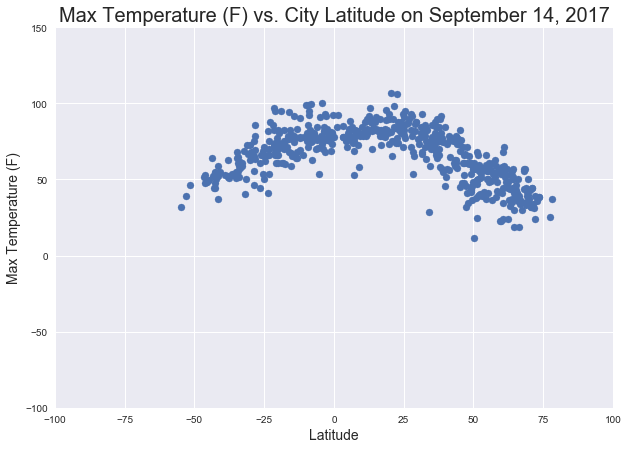

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Max Temperature (F)"]))
plt.title("Max Temperature (F) vs. City Latitude on September 14, 2017", fontsize=20)
plt.ylabel("Max Temperature (F)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-100, 150)
plt.xlim(-100, 100)
plt.savefig("TempvsLat.png")
plt.show()

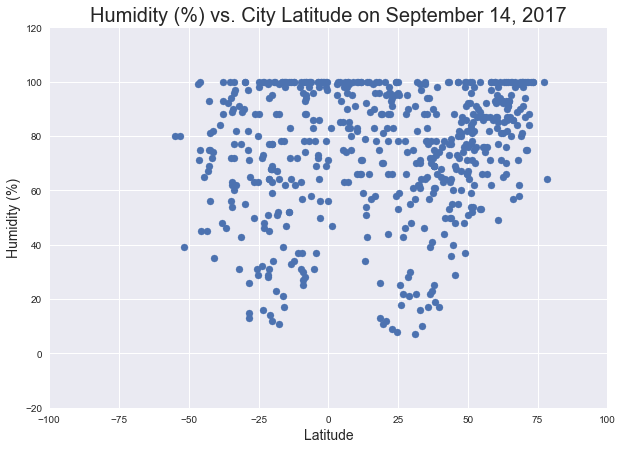

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Humidity (%)"]))
plt.title("Humidity (%) vs. City Latitude on September 14, 2017", fontsize=20)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-20, 120)
plt.xlim(-100, 100)
plt.savefig("HumidvsLat.png")
plt.show()

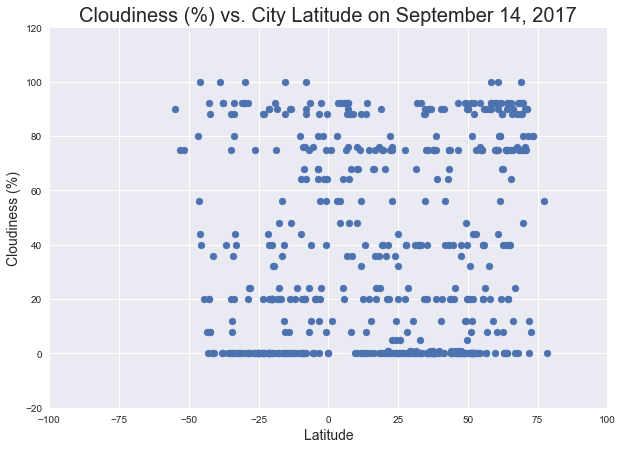

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Cloudiness (%)"]))
plt.title("Cloudiness (%) vs. City Latitude on September 14, 2017", fontsize=20)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-20, 120)
plt.xlim(-100, 100)
plt.savefig("CloudvsLat.png")
plt.show()

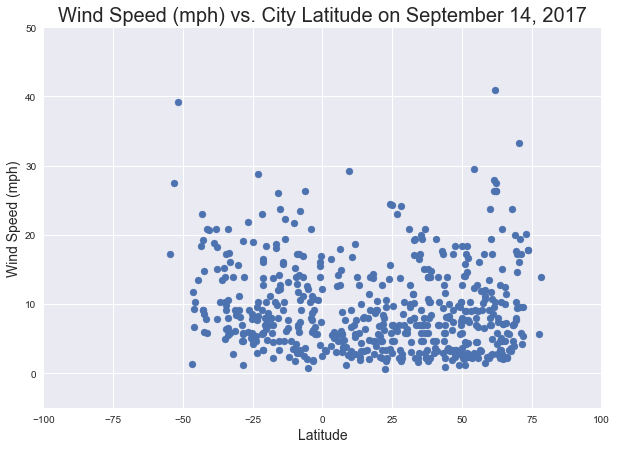

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(pd.to_numeric(weather_df["Latitude"]), pd.to_numeric(weather_df["Wind Speed (mph)"]))
plt.title("Wind Speed (mph) vs. City Latitude on September 14, 2017", fontsize=20)
plt.ylabel("Wind Speed (mph)", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylim(-5, 50)
plt.xlim(-100, 100)
plt.savefig("WindvsLat.png")
plt.show()

In [15]:
weather_df.to_csv("WeatherPy.csv")

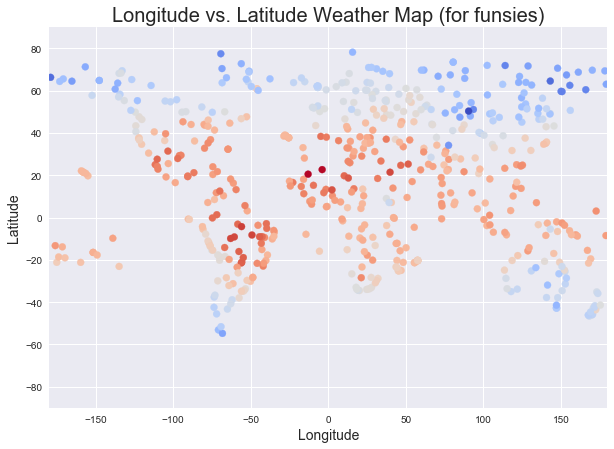

In [16]:
plt.figure(figsize=(10,7))
temperatures = pd.to_numeric(weather_df["Max Temperature (F)"])
plt.scatter(pd.to_numeric(weather_df["Longitude"]), pd.to_numeric(weather_df["Latitude"]), c=temperatures, cmap='coolwarm')
plt.title("Longitude vs. Latitude Weather Map (for funsies)", fontsize=20)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.ylim(-90, 90)
plt.xlim(-180, 180)
plt.savefig("heatmap.png")
plt.show()